In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Analysis of clusters in sample S3

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import BacSC.util_probe as up
import BacSC.util as ut
import BacSC.NB_est as nb
import BacSC.countsplit as cs
import BacSC.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/BacDrop"
data_gene = sc.read_h5ad(data_path + "/untreated_data_processed.h5ad")


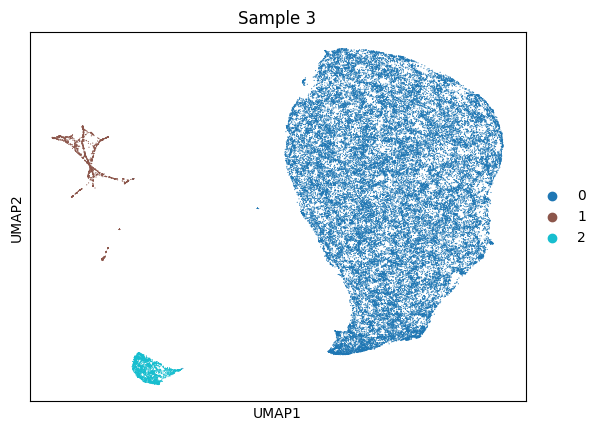

In [34]:
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [5]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB a

Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1300
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZIN

Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1900
Both NB and ZINB not converged! Using NB without starting params
gene 2000
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 2100
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting pa

In [6]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,product_accession,name,symbol,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000078,...,NaN,diguanylate cyclase,NaN,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00180,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000078,...,NaN,PTS transporter subunit EIIC,NaN,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,27,0.000618,False,0.015278,...,WP_228690243.1,integrase arm-type DNA-binding domain-containi...,NaN,0.000577,0.000618,-4.089462e-05,nb,0.000576,0.036261,0.000000
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,44,0.000967,False,0.021351,...,NaN,sugar ABC transporter ATP-binding protein,NaN,0.000928,0.000968,-4.036728e-05,nb,0.000926,0.022693,0.000000
cds-AF52_RS01000,293,0.006081,0.006063,99.396013,295.0,5.690360,293,0.006126,False,0.178261,...,NaN,IS5/IS1182 family transposase,NaN,0.006081,0.006127,-4.547581e-05,nb,0.006081,0.813157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,95,0.002017,False,0.063420,...,WP_187079189.1,ribonuclease D,rnd,0.001979,0.002016,-3.731159e-05,nb,0.001978,0.010619,0.000000
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,735,0.015597,False,0.812126,...,WP_187079192.1,IS5-like element IS903B family transposase,NaN,0.015378,0.015595,-2.170239e-04,nb,0.015378,1.089634,0.000000
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,182,0.003965,False,0.119991,...,WP_187079193.1,aspartate aminotransferase family protein,NaN,0.003814,0.003964,-1.503677e-04,nb,0.003823,0.028870,0.000000
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,93,0.002039,False,0.064837,...,WP_187079194.1,ribokinase,rbsK,0.001958,0.002037,-7.862051e-05,nb,0.001948,0.021523,0.000000


## Find optimal correlation matrix scaling and generate synthetic null data

In [7]:
importlib.reload(cd)
try:
    xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
except:
    _, R_est_noscale = cd.generate_nb_data_copula(data_gene, rng_seed=1234, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)
    xmin = 1
print(xmin)

Factor: 1 - Error: 74.44264524034035
Factor: 2 - Error: 74.2458799133629
Factor: 3.6180339999999998 - Error: 72.31437413781964
Factor: 6.2360680251559995 - Error: 60.695775525677256
Factor: 10.472136091015262 - Error: 42.77242004142963
Factor: 78.47854888720464 - Error: 25.7290236019326
Factor: 188.5152370094741 - Error: 26.0620419433045
Factor: 78.47854888720464 - Error: 25.7290236019326
Factor: 120.5088236028823 - Error: 25.233317981442458
Factor: 146.48496198620867 - Error: 25.260949307852677
Factor: 104.45468727053102 - Error: 25.306814912152294
Factor: 130.43082553636933 - Error: 25.29944391233942
Factor: 114.37668920401805 - Error: 25.217719713249807
Factor: 110.58682171427172 - Error: 25.324724478277037
Factor: 116.71895611313597 - Error: 25.320485355829007
Factor: 112.92908864053092 - Error: 25.033106176116146
Factor: 112.03442228835274 - Error: 24.99025179628144
Factor: 111.48148807299731 - Error: 25.07630896195772
Factor: 112.37615442517549 - Error: 25.092832771241994
Factor:

In [17]:
importlib.reload(cd)
# Catch abnormally high entries of scaling factor (Danger of non-PD correlation matrix)
if xmin > 3:
    xmin = 1

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [18]:
importlib.reload(cd)
n, p = data_gene.X.shape
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, new_data_shape=(2*n, p),
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)


In [19]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [20]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

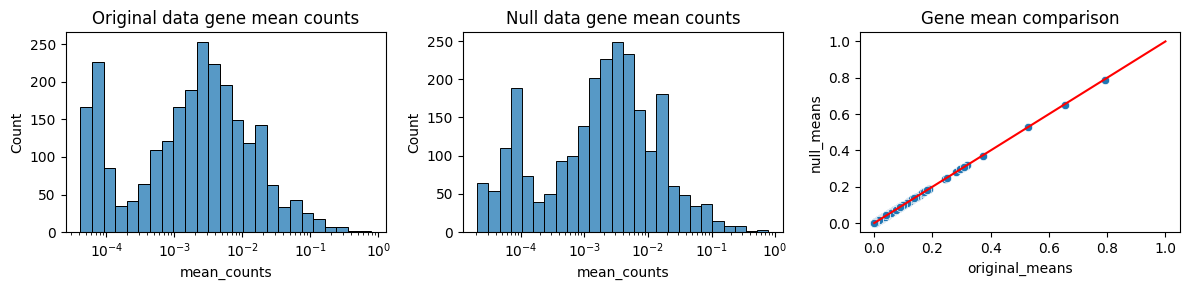

SignificanceResult(statistic=0.9969485038829525, pvalue=0.0)


In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

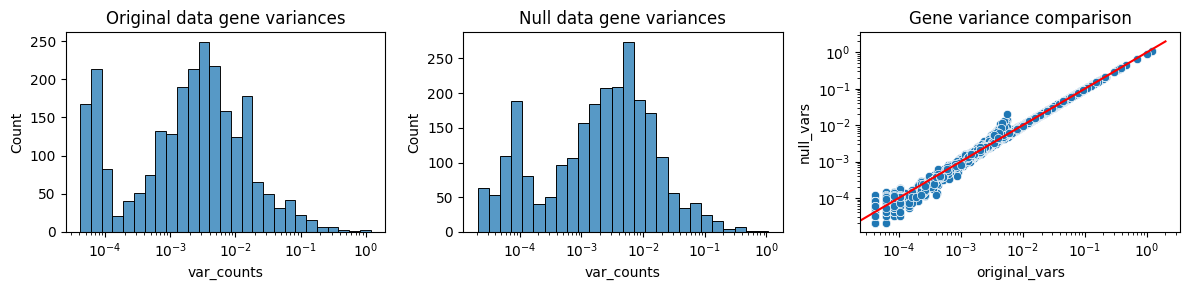

SignificanceResult(statistic=0.9934471078501175, pvalue=0.0)
[[1.         0.99867406]
 [0.99867406 1.        ]]


In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

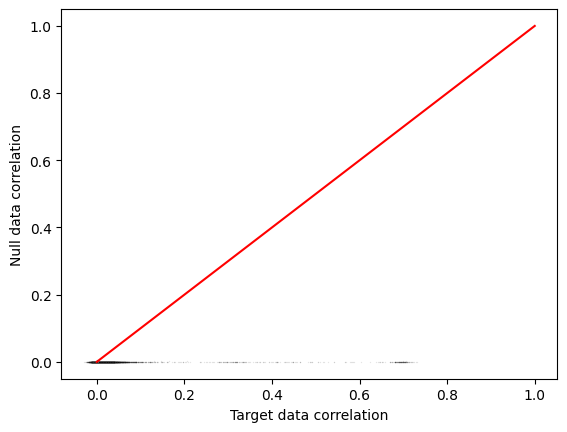

In [23]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [24]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [25]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform", seed=1234)
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


70


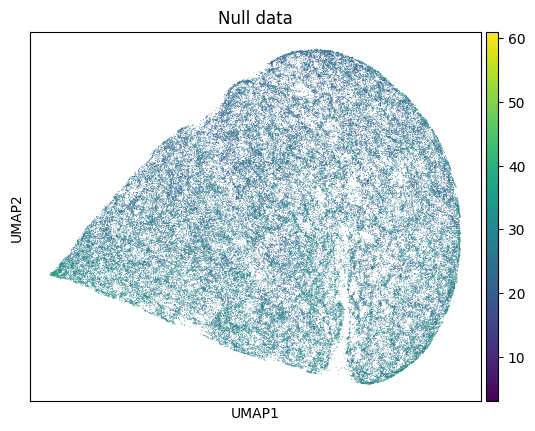

In [26]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [27]:
data_null_gen.write(data_path + "/null_data_untreated.h5ad")

In [28]:
data_null_gen = sc.read_h5ad(data_path + "/null_data_untreated.h5ad")
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

In [29]:
n_splits = 1
rng = np.random.default_rng(1234)
seeds = rng.choice(1000, n_splits)
null_pvals_dict = {}
min_pvals_null = []
c = 0
res_start = 0.01
res_step = 0.01

for s in seeds:
    res2 = res_start
    twoclust = False
    was_greater = False
    max_res_1_cluster = 0.01
    
    while twoclust is False:
        sc.tl.leiden(data_null_gen, resolution=res2, key_added=f"leiden_{c}", random_state=s)
        nclust = len(data_null_gen.obs[f"leiden_{c}"].unique())
        print(f"resolution: {res2}, clusters: {nclust}")

        if nclust == 2:
            twoclust = True
            break
        elif nclust < 2:
            if res2 > max_res_1_cluster:
                max_res_1_cluster = res2
            else: 
                res_step = res_step/2
            if was_greater:
                res2 += res_step
            else:
                res2 += 5*res_step
        else:
            was_greater = True
            min_res_2plus_clusters = res2
            res2 -= res_step
        res2 = np.round(res2, 15)

            
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] == "0"]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_{c}"] != "0"]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    null_pvals_dict[c] = null_pvals

    clusters = data_gene.obs["leiden_opt"].unique()
            
    min_pvals_null.append(np.min(null_pvals))
            
    print(f"split {c+1}/{n_splits} - Resolution {res2}")

    res_start = res2 - 5*res_step
    c += 1
    
best_split = np.where(min_pvals_null == np.max(min_pvals_null))[0][0]
print(f"Best split: No. {best_split} - seed: {seeds[best_split]} - minimal p-value: {min_pvals_null[best_split]}")

resolution: 0.01, clusters: 1
resolution: 0.035, clusters: 1
resolution: 0.06, clusters: 4
resolution: 0.055, clusters: 2
split 1/1 - Resolution 0.055
Best split: No. 0 - seed: 979 - minimal p-value: 9.559178731212002e-40


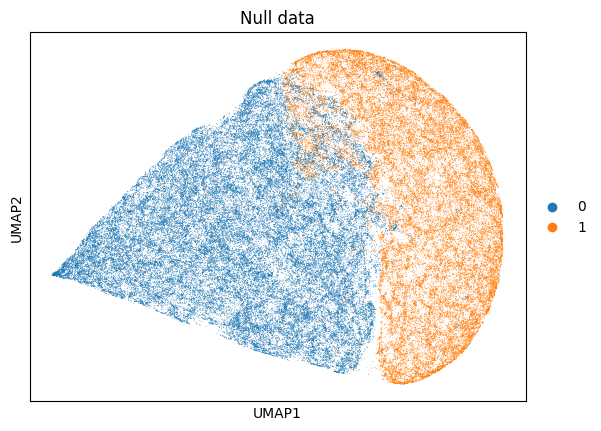

In [30]:
sc.pl.umap(data_null_gen, color=f"leiden_{best_split}", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [31]:
data_null_gen.obs["leiden_best"] = data_null_gen.obs[f"leiden_{best_split}"]

data_null_gen.write(data_path + "/null_data_untreated.h5ad")

In [32]:
importlib.reload(cd)
clusters = data_gene.obs["leiden_opt"].unique()
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05
rng = np.random.default_rng(1234)

for c in clusters:
    
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    
    n_cells_0 = X_data_0.shape[0]
    n_cells_1 = X_data_1.shape[0]
    
    X_null_gen_0 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] != "0"]
    X_null_gen_0 = X_null_gen_0[rng.integers(X_null_gen_0.shape[0], size=n_cells_0),:]
    X_null_gen_1 = data_null_gen.X[data_null_gen.obs[f"leiden_best"] == "0"]
    X_null_gen_1 = X_null_gen_1[rng.integers(X_null_gen_1.shape[0], size=n_cells_1),:]
    null_pvals = ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue
    
    pvals_data = ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue
    p_data = pd.DataFrame({"pval_data": pvals_data}, index=data_gene_nonzero.var.index)
    pval_null_gen = pd.DataFrame({"pval_null": null_pvals}, index=data_null_gen.var.index)
    
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 148; Minimum q value: 0.0072992700729927005
Cluster 1 - DE genes: 324; Minimum q value: 0.005988023952095809
Cluster 2 - DE genes: 0; Minimum q value: 0.09523809523809523


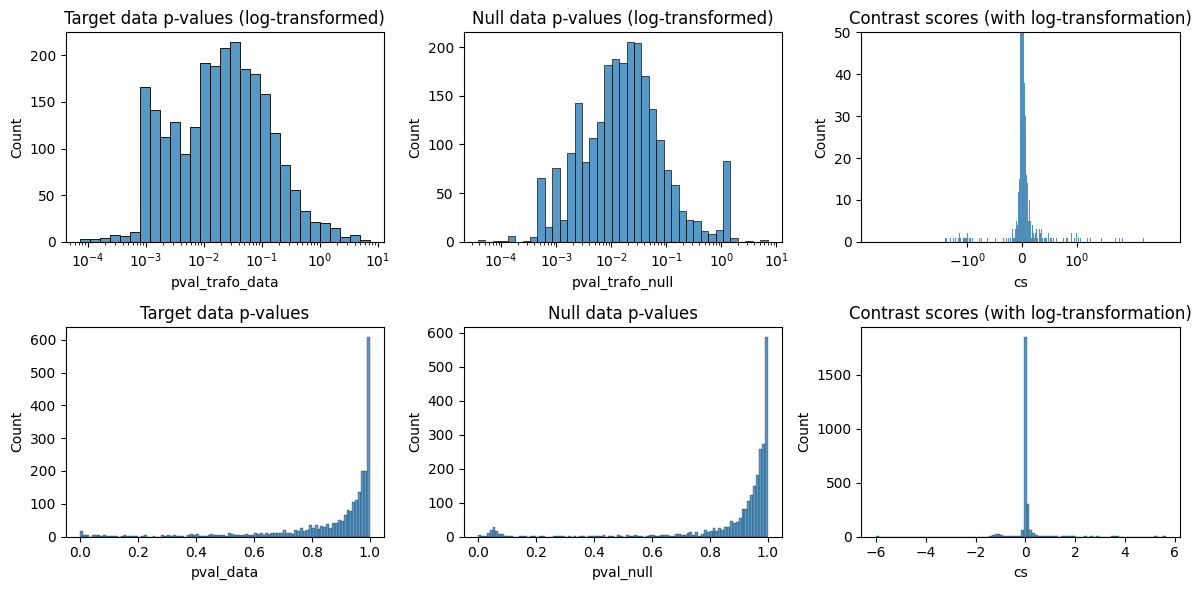

In [35]:
c = "2"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_trafo_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_trafo_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (with log-transformation)")


plt.tight_layout()
plt.show()

In [36]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
0.007299    137
0.014388      2
0.021429      1
0.027972      3
0.034722      1
           ... 
0.616783      7
0.621060     61
0.621910      6
0.622163      1
1.000000    986
Name: q, Length: 324, dtype: int64

cluster 1
0.005988    167
0.009615     41
0.012931     24
0.016807      6
0.020325      8
           ... 
0.550032      2
0.550323      1
0.553836      1
0.554124      1
1.000000    932
Name: q, Length: 341, dtype: int64

cluster 2
0.095238      21
0.425963     472
0.427435      10
0.427723       2
0.428854       1
            ... 
0.748170       1
0.750364       8
0.750545       1
0.752180       1
1.000000    1108
Name: q, Length: 172, dtype: int64



In [46]:
pvals_log_gen["2"][:21]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
cds-WP_002919759.1,2.082636e-06,0.896899,5.681387,0.047257,5.634130,0.095238
cds-WP_002884146.1,5.242664e-08,0.009753,7.280448,2.010878,5.269570,0.095238
cds-WP_004147333.1,1.413348e-04,0.772230,3.849751,0.112253,3.737498,0.095238
cds-WP_002919796.1,2.554618e-05,0.102736,4.592674,0.988275,3.604399,0.095238
cds-WP_002919515.1,1.924502e-05,0.057834,4.715682,1.237816,3.477865,0.095238
cds-WP_012068464.1,9.478432e-05,0.078304,4.023264,1.106216,2.917047,0.095238
cds-WP_002888731.1,4.721877e-04,0.213668,3.325885,0.670261,2.655625,0.095238
cds-WP_002884747.1,8.760454e-04,0.390515,3.057473,0.408363,2.649111,0.095238
cds-WP_032429833.1,1.948899e-04,0.084837,3.710211,1.071414,2.638797,0.095238
cds-AF52_RS19800,3.326020e-03,0.995420,2.478075,0.001994,2.476082,0.095238


In [39]:
data_gene_nonzero.uns["ClusterDE_results"] = pvals_log_gen

data_gene_nonzero.uns["ClusterDE_results"]['params'] = {'groupby': 'leiden_opt',
  'reference': 'rest',
  'use_raw': False,
  'layer': None,
}

In [40]:
data_gene_nonzero.write(data_path + "/untreated_data_processed_cluster.h5ad")

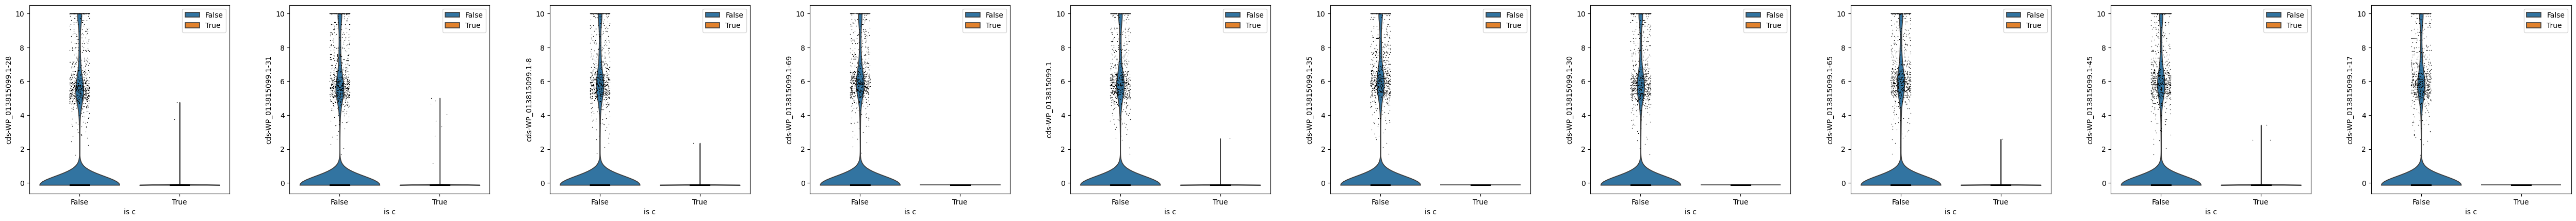

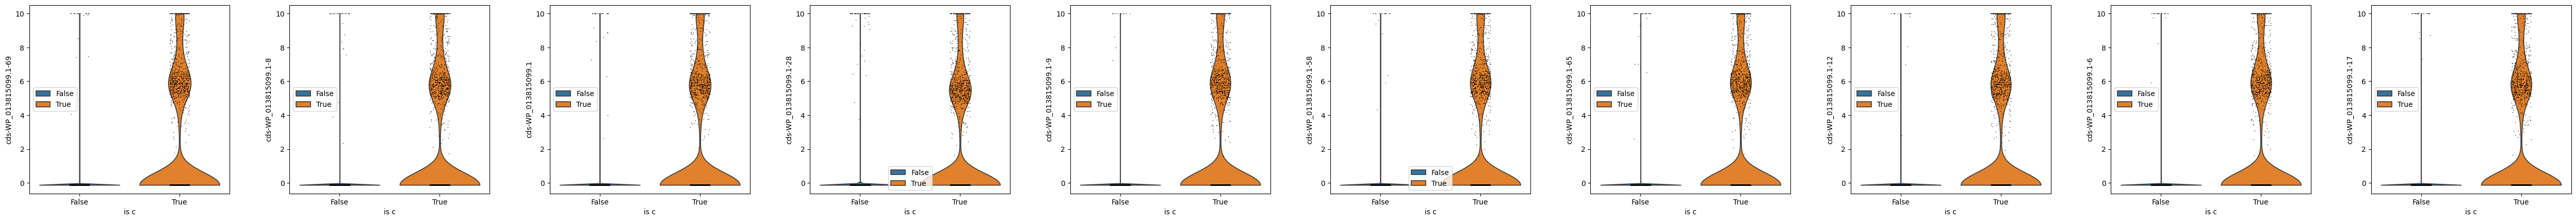

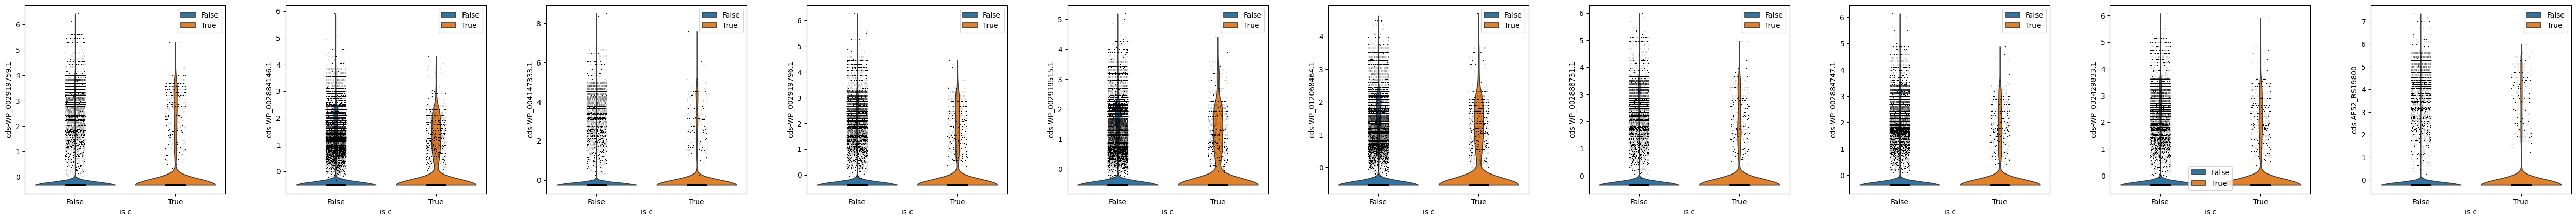

In [41]:
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:10,:].index.tolist()
    data_gene_nonzero.obs["is_c"] = pd.Categorical([x==c for x in data_gene_nonzero.obs["leiden_opt"]])
    with plt.rc_context({"figure.figsize": (5, 5)}):
        sc.pl.violin(data_gene_nonzero, keys=plot_genes, groupby="is_c", multi_panel=True)

In [42]:
data_gene.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,is_scd_outlier,nb_overdisp,...,product_accession,name,symbol,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
cds-AF52_RS00165,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000078,...,NaN,diguanylate cyclase,NaN,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00180,2,0.000041,0.000041,99.995877,2.0,1.098612,2,0.000041,False,0.000078,...,NaN,PTS transporter subunit EIIC,NaN,0.000041,0.000041,1.699728e-09,poi,0.000548,inf,0.919963
cds-AF52_RS00275,27,0.000577,0.000577,99.944343,28.0,3.367296,27,0.000618,False,0.015278,...,WP_228690243.1,integrase arm-type DNA-binding domain-containi...,NaN,0.000577,0.000618,-4.089462e-05,nb,0.000576,0.036261,0.000000
cds-AF52_RS00620,44,0.000928,0.000927,99.909299,45.0,3.828641,44,0.000967,False,0.021351,...,NaN,sugar ABC transporter ATP-binding protein,NaN,0.000928,0.000968,-4.036728e-05,nb,0.000926,0.022693,0.000000
cds-AF52_RS01000,293,0.006081,0.006063,99.396013,295.0,5.690360,293,0.006126,False,0.178261,...,NaN,IS5/IS1182 family transposase,NaN,0.006081,0.006127,-4.547581e-05,nb,0.006081,0.813157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cds-WP_187079189.1,95,0.001979,0.001977,99.804168,96.0,4.574711,95,0.002017,False,0.063420,...,WP_187079189.1,ribonuclease D,rnd,0.001979,0.002016,-3.731159e-05,nb,0.001978,0.010619,0.000000
cds-WP_187079192.1,735,0.015378,0.015261,98.484880,746.0,6.616065,735,0.015597,False,0.812126,...,WP_187079192.1,IS5-like element IS903B family transposase,NaN,0.015378,0.015595,-2.170239e-04,nb,0.015378,1.089634,0.000000
cds-WP_187079193.1,182,0.003814,0.003806,99.624827,185.0,5.225747,182,0.003965,False,0.119991,...,WP_187079193.1,aspartate aminotransferase family protein,NaN,0.003814,0.003964,-1.503677e-04,nb,0.003823,0.028870,0.000000
cds-WP_187079194.1,93,0.001958,0.001956,99.808291,95.0,4.564348,93,0.002039,False,0.064837,...,WP_187079194.1,ribokinase,rbsK,0.001958,0.002037,-7.862051e-05,nb,0.001948,0.021523,0.000000


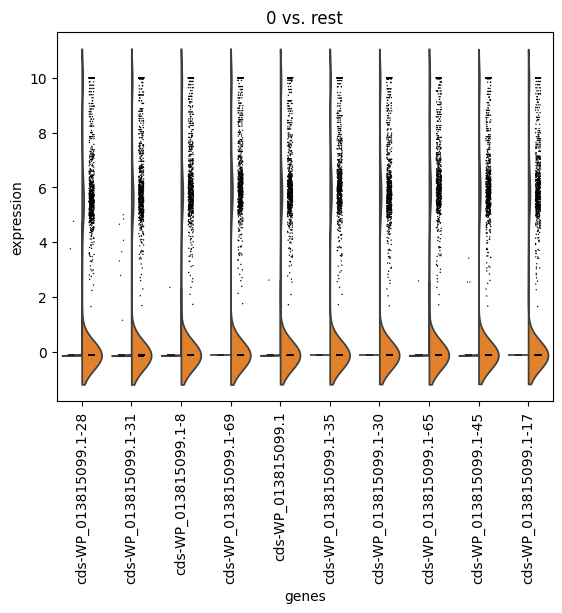

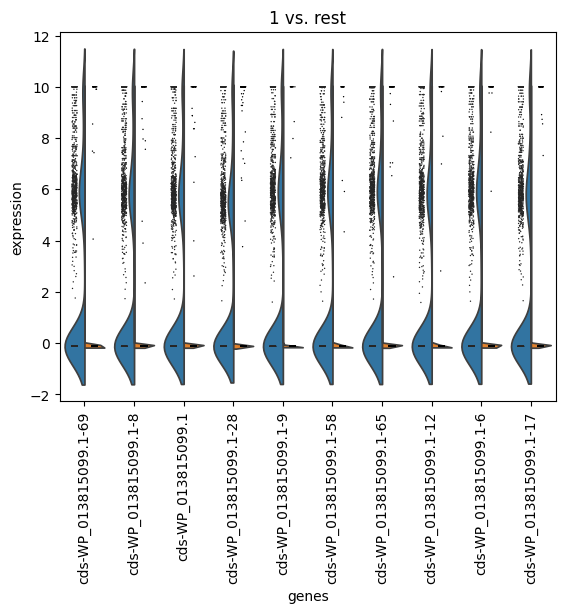

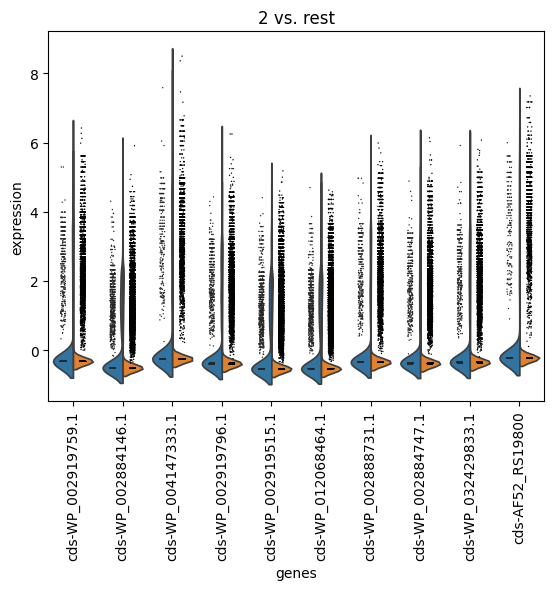

In [43]:
n_genes = 10
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    sc.pl.rank_genes_groups_violin(data_gene_nonzero, gene_names=plot_genes, key="ClusterDE_results", groups=c)

In [44]:
all_marker_genes = []
for c in clusters:
    plot_genes = data_gene_nonzero.uns["ClusterDE_results"][c].iloc[:n_genes,:].index.tolist()
    all_marker_genes += plot_genes
    print(f"Cluster {c}")
    print(data_gene.var.loc[plot_genes, ["locus_tag", "name", "symbol"]])

Cluster 0
                          locus_tag  \
cds-WP_013815099.1-28  AF52_RS22855   
cds-WP_013815099.1-31  AF52_RS22855   
cds-WP_013815099.1-8   AF52_RS22855   
cds-WP_013815099.1-69  AF52_RS22855   
cds-WP_013815099.1     AF52_RS22855   
cds-WP_013815099.1-35  AF52_RS22855   
cds-WP_013815099.1-30  AF52_RS22855   
cds-WP_013815099.1-65  AF52_RS22855   
cds-WP_013815099.1-45  AF52_RS22855   
cds-WP_013815099.1-17  AF52_RS22855   

                                                             name symbol  
cds-WP_013815099.1-28  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-31  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-8   IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-69  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1     IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-35  IS5-like element IS903B family transposase    NaN  
cds-WP_013815099.1-30  IS5-like ele

In [48]:

goi = data_gene_nonzero.uns["ClusterDE_results"]["2"].iloc[:21,:].index.tolist()
print(f"Cluster 2")
print(data_gene.var.loc[goi, ["locus_tag", "name", "symbol"]])

Cluster 2
                       locus_tag  \
cds-WP_002919759.1  AF52_RS08415   
cds-WP_002884146.1  AF52_RS04680   
cds-WP_004147333.1  AF52_RS14175   
cds-WP_002919796.1  AF52_RS08450   
cds-WP_002919515.1  AF52_RS08350   
cds-WP_012068464.1  AF52_RS12625   
cds-WP_002888731.1  AF52_RS06255   
cds-WP_002884747.1  AF52_RS04995   
cds-WP_032429833.1  AF52_RS13310   
cds-AF52_RS19800    AF52_RS19800   
cds-WP_002919516.1  AF52_RS08355   
cds-WP_002919545.1  AF52_RS08365   
cds-WP_002898408.1  AF52_RS11390   
cds-WP_004901914.1  AF52_RS04675   
cds-WP_000868187.1  AF52_RS25830   
cds-WP_002895039.1  AF52_RS12615   
cds-WP_032429672.1  AF52_RS15745   
cds-WP_002884740.1  AF52_RS04985   
cds-WP_001138115.1  AF52_RS08430   
cds-WP_004150944.1           NaN   
cds-WP_032430148.1  AF52_RS07305   

                                                                 name symbol  
cds-WP_002919759.1                          50S ribosomal protein L16   rplP  
cds-WP_002884146.1          DNA-directe

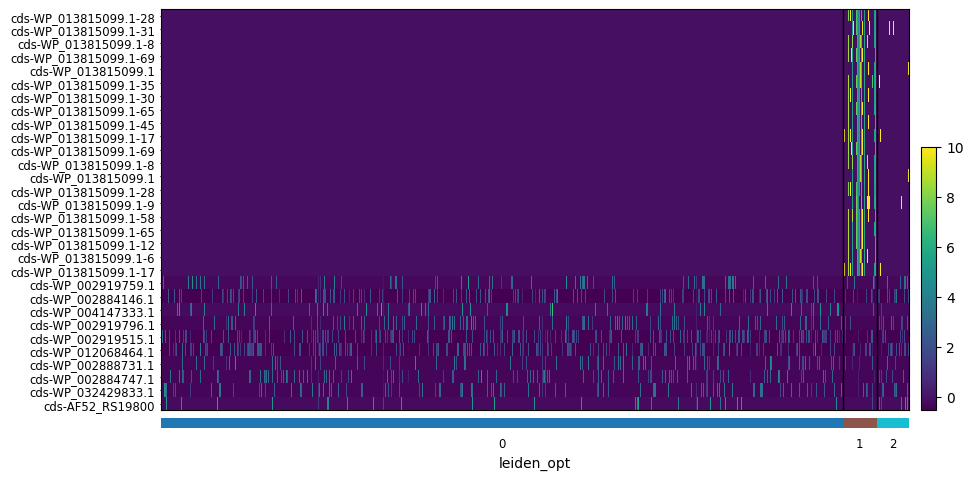

In [45]:
sc.pl.heatmap(data_gene_nonzero, all_marker_genes, groupby='leiden_opt', swap_axes=True, show_gene_labels=True)

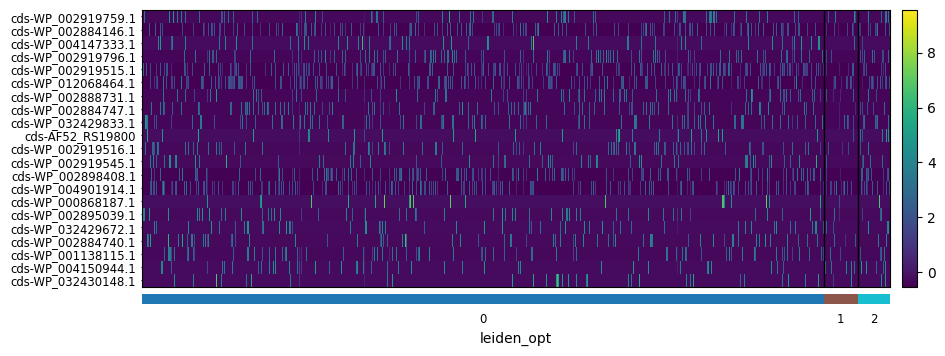

In [50]:
sc.pl.heatmap(data_gene_nonzero, goi, groupby='leiden_opt', swap_axes=True, show_gene_labels=True)